Loading packages and data 

In [21]:
# load packages 

import numpy as np 
import pandas as pd 
import csv 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap


In [22]:
train_in = pd.read_csv('train_in - Copy.csv', header=None)
train_out = pd.read_csv('train_out - Copy.csv', header=None)
test_in = pd.read_csv('test_in - Copy.csv', header=None)
test_out = pd.read_csv('test_out - Copy.csv', header=None)

# Convert data to numpy arrays
X_train = train_in.to_numpy()
y_train = train_out.to_numpy().flatten()
X_test = test_in.to_numpy()
y_test = test_out.to_numpy().flatten()


print(train_in.shape)
print(train_in.tail())

(1707, 256)
      0    1    2    3      4      5      6      7      8      9    ...  \
1702 -1.0 -1.0 -1.0 -1.0 -1.000 -0.889  0.497  0.988  0.244 -0.861  ...   
1703 -1.0 -1.0 -1.0 -1.0 -1.000 -0.961 -0.211  0.647  0.464 -0.071  ...   
1704 -1.0 -1.0 -1.0 -1.0 -0.948 -0.307 -0.718 -0.178  0.543  1.000  ...   
1705 -1.0 -1.0 -1.0 -1.0 -1.000 -0.806  0.417  1.000  0.627 -0.559  ...   
1706 -1.0 -1.0 -1.0 -1.0 -0.338  0.637  1.000  0.464  0.428 -0.161  ...   

        246    247    248    249    250    251  252  253  254  255  
1702  0.401  0.752  1.000  0.609  0.206 -0.974 -1.0 -1.0 -1.0 -1.0  
1703 -0.983  0.635  0.236 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0  
1704 -0.822  0.720 -0.716 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0  
1705  0.491  0.866 -0.712 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0 -1.0  
1706 -0.682  0.195  0.755  0.415 -0.541 -1.000 -1.0 -1.0 -1.0 -1.0  

[5 rows x 256 columns]


PCA

In [23]:
# PCA 
 
pca_data = PCA(n_components = 2)
principalComponents = pca_data.fit_transform(X_train)

# dataframe with values 
pca_Df = pd.DataFrame(data = principalComponents,
                      columns = ["pc1", "pc2"])

Explained variance per principal component: [0.19313806 0.0922871 ]


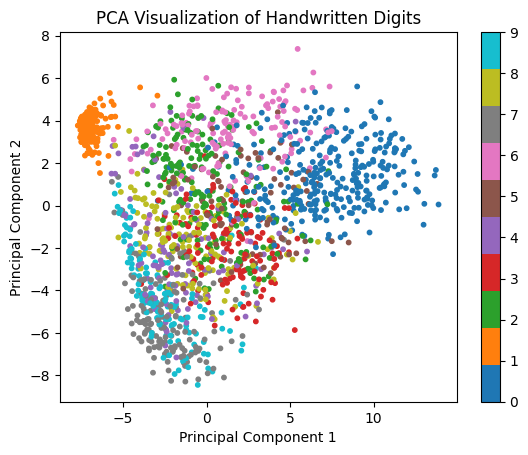

In [24]:
# explained variance & visualization 

print("Explained variance per principal component: {}".format(pca_data.explained_variance_ratio_))

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_train, cmap="tab10", s=10)
plt.title("PCA Visualization of Handwritten Digits")
plt.xlabel("Principal Component 1") 
plt.ylabel("Principal Component 2") 
plt.colorbar()
plt.show()



UMAP

c:\Users\Jorena\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


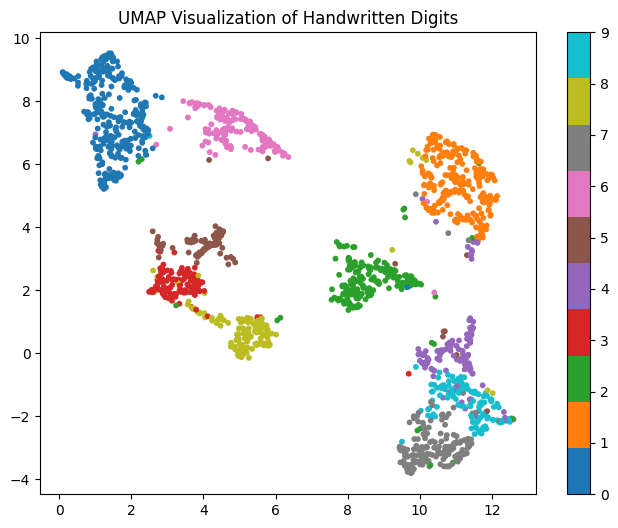

In [25]:
# UMAP

umap_reducer = umap.UMAP(n_components=2)
umap_data = umap_reducer.fit_transform(X_train)  

plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=train_out, cmap='tab10', s=10)
plt.title("UMAP Visualization of Handwritten Digits")
plt.colorbar()
plt.show()


t-SNE

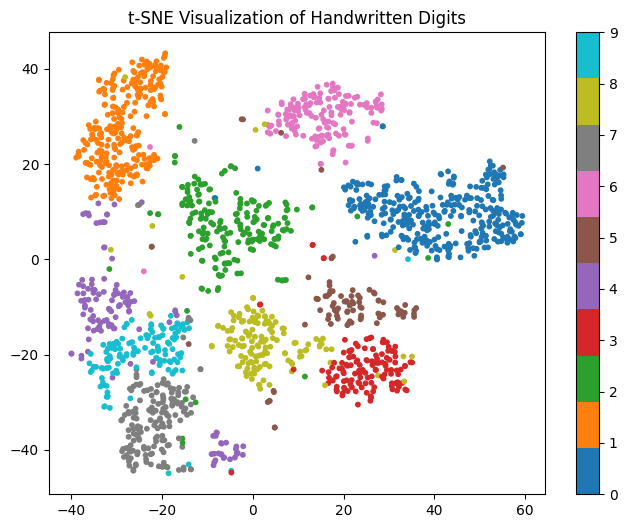

In [26]:
# t-SNE 

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X_train)  

plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=train_out, cmap="tab10", s=10)
plt.title("t-SNE Visualization of Handwritten Digits")
plt.colorbar()
plt.show()

just some prelim. comments 
* clean-up code, comments, graphs, etc.
* like task 1.1, clusters 7 and 9 overlap in the PCA (but so do quite a lot of other clusters), and are close together (and somewhat overlap) in the UMAP and t-SNE visualizations, implying that the distance between the centers of digits 7 and 9 are indeed close to each other 